In [2]:
import numpy as np
import math
from time import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt('dataset5.txt')
print (data)

[[  0.   20.6  14.4 ...,  19.6   1.    0. ]
 [  1.   13.3  11.1 ...,  11.3   1.    0. ]
 [  0.   16.7  14.3 ...,  14.7   0.    1. ]
 ..., 
 [  1.    8.8   7.7 ...,   7.4   1.    0. ]
 [  1.   16.2  15.2 ...,  13.9   0.    1. ]
 [  0.   15.6  14.  ...,  13.8   0.    1. ]]


In [4]:
train = data[0]
for i in range (1,140):
    train = np.row_stack((train,data[i]))

print(train.shape)

(140, 8)


In [36]:
#classify traning data
class0 = []
class1 = []
for sample in train:
    if sample[0] == 0:
        class0.append(sample)
    else:
        class1.append(sample)
class0 = np.array(class0)
class1 = np.array(class1)  

In [117]:
def compute_uj(data_set): #compute mean µ
    nj = len(data_set)
    data_set = np.delete(data_set,0,1)
    sum = np.zeros(shape=(1,data_set.shape[1]))
    for data in data_set:
        sum += data
    uj = sum/nj
    uj = uj.T
    return uj

In [118]:
def compute_covj(uj,data_set): #compute covariance matrix
    nj = len(data_set)
    sum = np.zeros(shape=(7,7))
    data_set = np.delete(data_set,0,1)
    for data in data_set:#
        a = np.zeros(shape=(1,7))
        data = data+a
        data = data.T
        sum += (data-uj)@(data-uj).T
        cov = sum/nj
    return cov
    

In [119]:
def gx(x,u,cov): #discriminant function for problem 1
    I = np.eye(7)
    cov_inv = np.linalg.inv(cov+0.0001*I)
    gx =  -0.5*(x-u).T@cov_inv@(x-u)- 7/2*math.log(2*math.pi)-1/2*math.log(abs(np.linalg.det(cov)))+math.log(0.5)
    return gx
            

In [120]:
u0 = compute_uj(class0)
u1 = compute_uj(class1)
cov0 = compute_covj(u0,class0)
cov1 = compute_covj(u1,class1)


In [121]:
test = data[140]
for i in range (141,200):
    test = np.row_stack((test,data[i]))
#print(test.shape)
test_x = np.delete(test,0,1)
train_x = np.delete(train,0,1)
print(train_x.shape)

(140, 7)


In [128]:
#classify and compute time for problem 1
test_y = []
begin = time()
data_x = np.delete(data,0,1)###
for x in data_x:###
    a = np.zeros(shape=(1,7))
    x = x+a
    x = x.T
    gx0 = gx(x,u0,cov0)
    gx1 = gx(x,u1,cov1)
    if gx0 > gx1:
        test_y.append(0)
    else:
        test_y.append(1)
end = time()
total_time = end -begin
print(total_time)
print (test_y)
sum = 0
for i in test_y:
    sum += i
print (sum)
test_y_real = data[:,0]#####
print(test_y_real)
sum2 = 0
for i in test_y_real:
    sum2 += i
print (sum2)

0.024564743041992188
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
100
[ 0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.
  1.  1. 

In [89]:
test_y = np.array(test_y)
print (test_y-test_y_real)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [138]:
#discriminant function 
def gx_lda(x,u0,cov0,u1,cov1,t):
    cov_inv = np.linalg.inv(cov0+cov1)
    I = np.eye(7)
    cov0_inv = np.linalg.inv(cov0+0.00001*I)
    cov1_inv = np.linalg.inv(cov1+0.00001*I)
    gx = cov_inv@(u1-u0)  
    gx = gx.T@x
    gx = gx - 1/4*(u0.T@cov0_inv@u0 - u1.T@cov1_inv@u1 + t)
    return gx

In [152]:
#classify and compute time 
test_y = []
list =[]
begin = time()
data_x = np.delete(data,0,1)
u0 = compute_uj(class0)
u1 = compute_uj(class1)
cov0 = compute_covj(u0,class0)
cov1 = compute_covj(u1,class1)
for x in data_x:###
    a = np.zeros(shape=(1,7))
    x = x+a
    x = x.T
    t =-32
    gx = gx_lda(x,u0,cov0,u1,cov1,t)
    list.append(gx)     
    if gx>0:
        test_y.append(1)
    else:
        test_y.append(0)
end = time()
total_time = end -begin
print(total_time)
print (test_y)
sum = 0
for i in test_y:
    sum += i
print (sum)
test_y_real =data[:,0]
print(test_y_real)
sum2 = 0
for i in test_y_real:
    sum2 += i
print (sum2)

0.026081085205078125
[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
100
[ 0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.
  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.
  1.  1. 

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


140


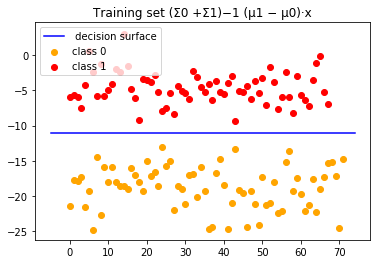

In [36]:
list_0=[]
list_1=[]
for i in range (0,140):
    if test_y_real[i] == 0:
        list_0.append(list[i])
    else:
        list_1.append(list[i])
print(len(list))       
xrange1 = np.arange(0,len(list_0))       
plt.scatter(xrange1,list_0, color = "orange",label="class 0")
xrange2 = np.arange(0,len(list_1))       
plt.scatter(xrange2,list_1, color = "red",label="class 1")
xrange3 = np.arange(-5,75)
y = 0*xrange3 -11
plt.plot(xrange3,y, color = "blue",label=" decision surface")
plt.legend(loc='upper left')
plt.title('Training set (Σ0 +Σ1)−1 (µ1 − µ0)·x')

[[-9.77606053]]


(1, 3)
